In [ ]:
# WE WILL IMPORT ALL THE NECESSARY LIBRARIES

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [8]:
# NOW WE WILL PERFORM ALL THE STEPS AND FIRST WE WILL LOAD THE DATA
# In this dataset our target variable will be MPG and our predictive variables will be all the others

In [9]:
auto=pd.read_csv('autos.csv')

In [13]:
auto.head

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [17]:
auto.shape

(398, 9)

In [23]:
auto['origin']=auto['origin'].replace({1:'America',2:'Europe',3:'Asia'}) #here we changed the values or replaced the values

In [34]:
auto.drop('car name',inplace=True,axis=1)

In [35]:
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,America
1,15.0,8,350.0,165,3693,11.5,70,America
2,18.0,8,318.0,150,3436,11.0,70,America
3,16.0,8,304.0,150,3433,12.0,70,America
4,17.0,8,302.0,140,3449,10.5,70,America
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,America
394,44.0,4,97.0,52,2130,24.6,82,Europe
395,32.0,4,135.0,84,2295,11.6,82,America
396,28.0,4,120.0,79,2625,18.6,82,America


In [36]:
auto.isnull().sum() #checkin the missing values

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [41]:
auto.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin           object
dtype: object

In [46]:
horse=pd.DataFrame(auto.horsepower.str.isdigit())

In [129]:
auto[horse['horsepower']==False] # to check which values are null

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_America,origin_Europe,origin_Japanese
32,25.0,4,98.0,93.5,2046,19.0,71,1,0,0
126,21.0,6,200.0,93.5,2875,17.0,74,1,0,0
330,40.9,4,85.0,93.5,1835,17.3,80,0,1,0
336,23.6,4,140.0,93.5,2905,14.3,80,1,0,0
354,34.5,4,100.0,93.5,2320,15.8,81,0,1,0
374,23.0,4,151.0,93.5,3035,20.5,82,1,0,0


In [50]:
auto=auto.replace('?',np.nan) #replaces? with question

In [52]:
auto.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [54]:
auto.median()

C:\Users\Dell E7450\AppData\Local\Temp\ipykernel_1040\390566574.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  auto.median()


mpg               23.0
cylinders          4.0
displacement     148.5
horsepower        93.5
weight          2803.5
acceleration      15.5
model year        76.0
dtype: float64

In [59]:
auto['horsepower']=auto['horsepower'].fillna(auto['horsepower'].median())

In [62]:
auto.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [63]:
auto.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin           object
dtype: object

In [64]:
auto['horsepower']=auto['horsepower'].astype('float64')

In [66]:
auto['horsepower'].dtypes 

dtype('float64')

In [67]:
# data type is changed in above code

In [68]:
# now we have to create a dummy data this is because we have to make the algo read our data and it cannot read america asia eurpoe so we will create a dummy data

In [69]:
auto=pd.get_dummies(auto,['origin']) # we should have numerical columns

In [70]:
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_America,origin_Europe,origin_Japanese
0,18.0,8,307.0,130.0,3504,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,0,0
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,0,0
394,44.0,4,97.0,52.0,2130,24.6,82,0,1,0
395,32.0,4,135.0,84.0,2295,11.6,82,1,0,0
396,28.0,4,120.0,79.0,2625,18.6,82,1,0,0


In [71]:
auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_America,origin_Europe,origin_Japanese
mpg,1.000000,-0.775396,-0.804203,-0.773453,-0.831741,0.420289,0.579267,-0.568192,0.259022,0.442174
cylinders,-0.775396,1.000000,0.950721,0.841284,0.896017,-0.505419,-0.348746,0.604351,-0.352861,-0.396479
displacement,-0.804203,0.950721,1.000000,0.895778,0.932824,-0.543684,-0.370164,0.651407,-0.373886,-0.433505
horsepower,-0.773453,0.841284,0.895778,1.000000,0.862442,-0.686590,-0.413733,0.485418,-0.282877,-0.318972
weight,-0.831741,0.896017,0.932824,0.862442,1.000000,-0.417457,-0.306564,0.598398,-0.298843,-0.440817
acceleration,0.420289,-0.505419,-0.543684,-0.686590,-0.417457,1.000000,0.288137,-0.250806,0.204473,0.109144
model year,0.579267,-0.348746,-0.370164,-0.413733,-0.306564,0.288137,1.000000,-0.139883,-0.024489,0.193101
origin_America,-0.568192,0.604351,0.651407,0.485418,0.598398,-0.250806,-0.139883,1.000000,-0.597198,-0.643317
origin_Europe,0.259022,-0.352861,-0.373886,-0.282877,-0.298843,0.204473,-0.024489,-0.597198,1.000000,-0.229895
origin_Japanese,0.442174,-0.396479,-0.433505,-0.318972,-0.440817,0.109144,0.193101,-0.643317,-0.229895,1.000000


In [ ]:
# we are constructing bivariate plot over here

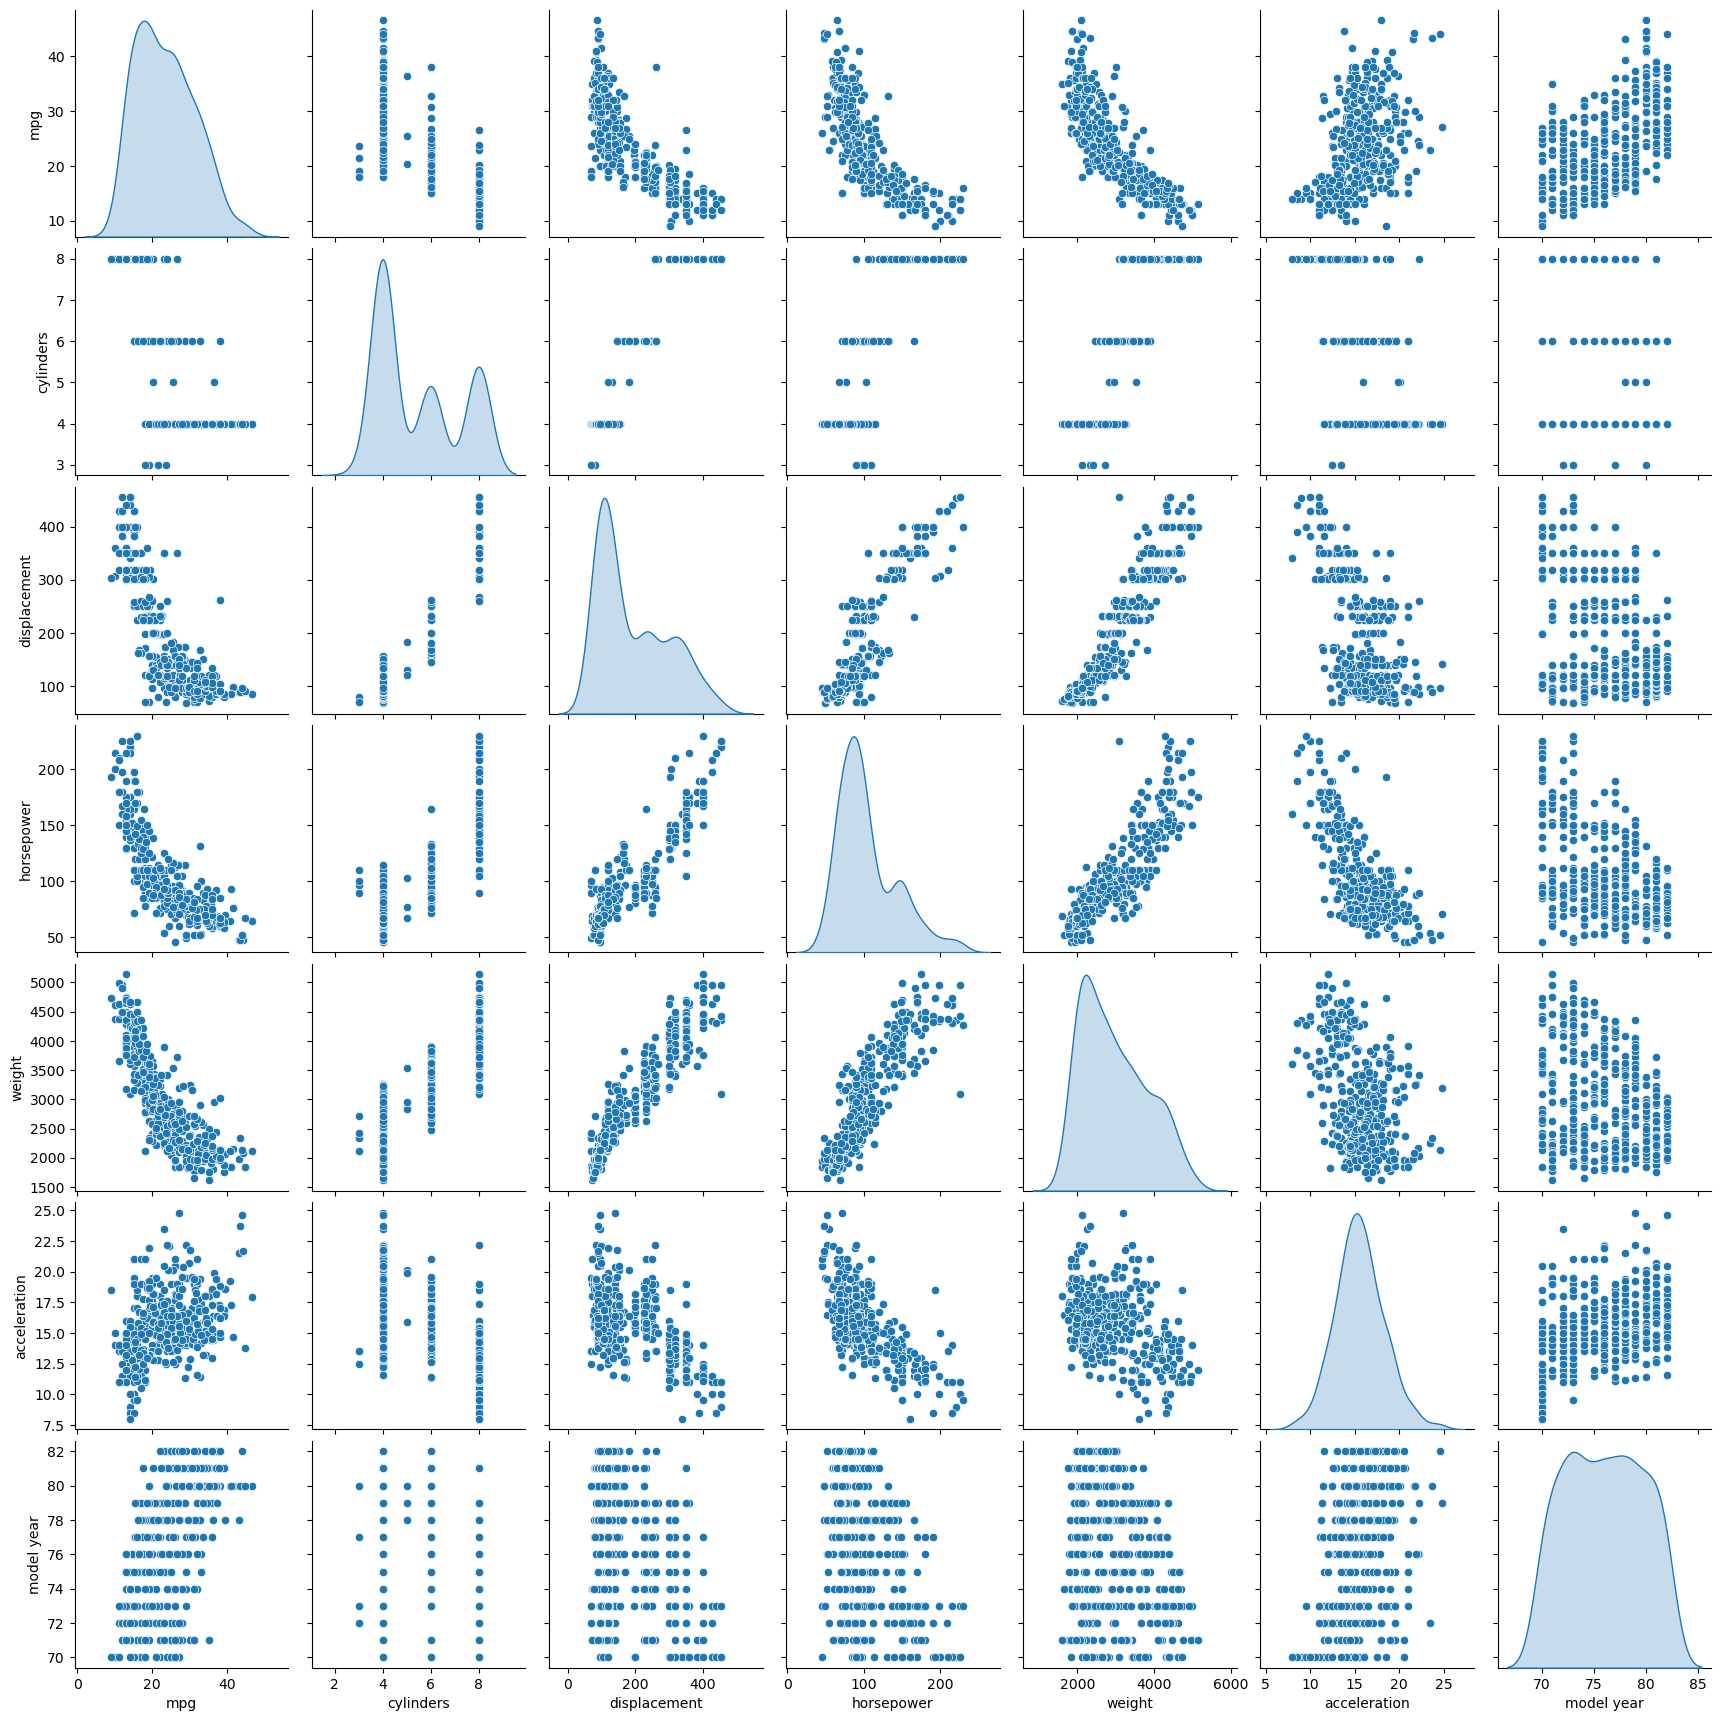

In [81]:
 auto_new=auto.iloc[:,0:7]
sns.pairplot(auto_new,diag_kind='kde')

In [82]:
#building MAchine Learning model

In [83]:
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_America,origin_Europe,origin_Japanese
0,18.0,8,307.0,130.0,3504,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,0,0
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,0,0
394,44.0,4,97.0,52.0,2130,24.6,82,0,1,0
395,32.0,4,135.0,84.0,2295,11.6,82,1,0,0
396,28.0,4,120.0,79.0,2625,18.6,82,1,0,0


In [84]:
y=auto['mpg']
x=auto.drop('mpg',axis=1)

In [85]:
y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 398, dtype: float64

In [86]:
x

,cylinders,displacement,horsepower,weight,acceleration,model year,origin_America,origin_Europe,origin_Japanese
0,8,307.0,130.0,3504,12.0,70,1,0,0
1,8,350.0,165.0,3693,11.5,70,1,0,0
2,8,318.0,150.0,3436,11.0,70,1,0,0
3,8,304.0,150.0,3433,12.0,70,1,0,0
4,8,302.0,140.0,3449,10.5,70,1,0,0
...,...,...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790,15.6,82,1,0,0
394,4,97.0,52.0,2130,24.6,82,0,1,0
395,4,135.0,84.0,2295,11.6,82,1,0,0
396,4,120.0,79.0,2625,18.6,82,1,0,0


In [97]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,train_size=0.70,random_state=6)

In [103]:
model=LinearRegression()


In [104]:
model.fit(x_train,y_train)

LinearRegression()

In [105]:
model.intercept_

-15.878974226973767

In [106]:
model.coef_

array([-0.58555642,  0.035149  , -0.01653479, -0.0077554 ,  0.1358269 ,
        0.78200129, -2.19691047,  1.3009495 ,  0.89596097])

In [108]:
for idx,col_name in enumerate(x_train.columns):
    print('The coefficient for {} is {}'.format(col_name,model.coef_[idx]))

The coefficient for cylinders is -0.5855564171084148
The coefficient for displacement is 0.03514899990948326
The coefficient for horsepower is -0.016534787061181392
The coefficient for weight is -0.007755400170223722
The coefficient for acceleration is 0.13582689559769295
The coefficient for model year is 0.7820012864571331
The coefficient for origin_America is -2.1969104702304745
The coefficient for origin_Europe is 1.3009494969307625
The coefficient for origin_Japanese is 0.8959609732997117


In [110]:
model.predict(x_test) #this is prediction for whole testing values

array([17.8057581 , 10.45655566, 21.67732592,  9.69533536, 19.90078307,
       24.00598352, 24.7677489 , 28.88494012, 34.78702701, 35.2001609 ,
       29.91506329, 28.26796752, 34.86981974, 21.4248305 , 16.35668533,
       23.87225801, 34.72130493, 27.61167678, 27.1494716 , 16.62511487,
       24.72891794, 23.08380102, 21.39712344, 23.72979156,  9.05298167,
       24.42624752, 14.63954858, 35.24789555, 22.81468932,  5.28808005,
       25.34553168, 12.13278125, 16.96729957, 23.71574264, 24.01522738,
       28.64701156, 23.33225754, 24.78494119, 21.830208  , 12.6951104 ,
       33.97139908, 20.2948538 , 14.95768902, 16.53398164, 23.49230243,
       28.84765   , 25.38366545, 36.393385  , 30.40895304, 11.07276761,
       34.8525131 , 33.8333401 , 19.65332435, 35.5123949 , 14.83301438,
       19.84968553, 32.35449315, 27.19965399, 20.88522002, 25.2003638 ,
       33.75232497, 28.44805677, 26.64567129, 14.33856987, 18.14897455,
       32.28943438, 31.91672855, 17.96355707, 30.34442111, 30.44

In [114]:
x_test

,cylinders,displacement,horsepower,weight,acceleration,model year,origin_America,origin_Europe,origin_Japanese
134,6,258.0,110.0,3632,18.0,74,1,0,0
137,8,350.0,150.0,4699,14.5,74,1,0,0
13,8,455.0,225.0,3086,10.0,70,1,0,0
95,8,455.0,225.0,4951,11.0,73,1,0,0
263,6,231.0,165.0,3445,13.4,78,1,0,0
...,...,...,...,...,...,...,...,...,...
385,4,91.0,67.0,1995,16.2,82,0,0,1
44,8,400.0,175.0,5140,12.0,71,1,0,0
100,6,250.0,88.0,3021,16.5,73,1,0,0
69,8,350.0,160.0,4456,13.5,72,1,0,0


In [117]:
# for one value we can also predict consider we are going to take 1st values 
model.predict(np.array([6,258.0,110.0,3632,18.0,74,1,0,0]).reshape(1,-1))

D:\anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([17.8057581])

In [118]:
model.score(x_train,y_train)

0.8322234248772612

In [119]:
model.score(x_test,y_test)

0.8043079254680418

In [122]:
prediction=model.predict(x_test)
prediction

array([17.8057581 , 10.45655566, 21.67732592,  9.69533536, 19.90078307,
       24.00598352, 24.7677489 , 28.88494012, 34.78702701, 35.2001609 ,
       29.91506329, 28.26796752, 34.86981974, 21.4248305 , 16.35668533,
       23.87225801, 34.72130493, 27.61167678, 27.1494716 , 16.62511487,
       24.72891794, 23.08380102, 21.39712344, 23.72979156,  9.05298167,
       24.42624752, 14.63954858, 35.24789555, 22.81468932,  5.28808005,
       25.34553168, 12.13278125, 16.96729957, 23.71574264, 24.01522738,
       28.64701156, 23.33225754, 24.78494119, 21.830208  , 12.6951104 ,
       33.97139908, 20.2948538 , 14.95768902, 16.53398164, 23.49230243,
       28.84765   , 25.38366545, 36.393385  , 30.40895304, 11.07276761,
       34.8525131 , 33.8333401 , 19.65332435, 35.5123949 , 14.83301438,
       19.84968553, 32.35449315, 27.19965399, 20.88522002, 25.2003638 ,
       33.75232497, 28.44805677, 26.64567129, 14.33856987, 18.14897455,
       32.28943438, 31.91672855, 17.96355707, 30.34442111, 30.44

In [124]:
error=metrics.mean_absolute_error(y_test ,prediction) #error of actual vs against

In [125]:
error

2.848420451783042

In [126]:
RMSE=np.sqrt(error)

In [127]:
RMSE

1.6877264149686826

In [ ]:
# THIS IS OUR LINEAR REGRESSION MODEL